<a href="https://colab.research.google.com/github/ellen107/bilingual_mnist/blob/main/bilingual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import cv2 as cv
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [12]:
!git clone https://github.com/ellen107/bilingual_mnist.git

Cloning into 'bilingual_mnist'...
remote: Enumerating objects: 75059, done.
remote: Counting objects: 100% (75059/75059), done.
remote: Compressing objects: 100% (75056/75056), done.
remote: Total 75059 (delta 8), reused 75031 (delta 1), pack-reused 0
Receiving objects: 100% (75059/75059), 20.02 MiB | 34.00 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (75018/75018), done.


In [2]:
%cd /content/bilingual_mnist

/content/bilingual_mnist


In [3]:
import pathlib
data_dir = pathlib.Path("/content/bilingual_mnist/bilingual_data/")

batch_size = 32
img_height = 28
img_width = 28

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 75009 files belonging to 15 classes.
Using 60008 files for training.


In [5]:
image_count = len(list(data_dir.glob('*/*.png')))
image_count

75009

In [6]:
one = list(data_dir.glob('1/*'))
PIL.Image.open(str(one[0]))

In [7]:
two = list(data_dir.glob('2/*'))
PIL.Image.open(str(two[0]))

In [8]:
hundred = list(data_dir.glob('100/*'))
PIL.Image.open(str(hundred[0]))

In [9]:
thousand = list(data_dir.glob('1000/*'))
PIL.Image.open(str(thousand[0]))

In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 75009 files belonging to 15 classes.
Using 15001 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '100', '1000', '10000', '100000000', '2', '3', '4', '5', '6', '7', '8', '9']


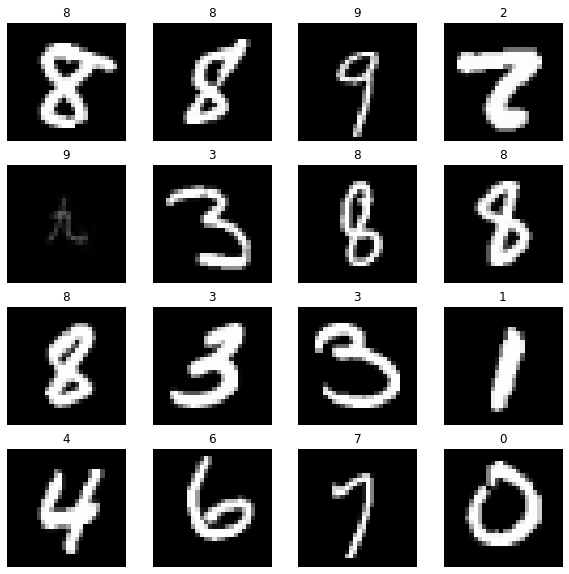

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)         

In [29]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
1876/1876 [==============================] - 53s 28ms/step - loss: 0.3963 - accuracy: 0.8752 - val_loss: 0.1634 - val_accuracy: 0.9474
Epoch 2/5
1876/1876 [==============================] - 57s 30ms/step - loss: 0.1265 - accuracy: 0.9613 - val_loss: 0.0960 - val_accuracy: 0.9733
Epoch 3/5
1876/1876 [==============================] - 51s 27ms/step - loss: 0.0778 - accuracy: 0.9755 - val_loss: 0.0886 - val_accuracy: 0.9756
Epoch 4/5
1876/1876 [==============================] - 52s 28ms/step - loss: 0.0584 - accuracy: 0.9814 - val_loss: 0.0737 - val_accuracy: 0.9789
Epoch 5/5
1876/1876 [==============================] - 50s 26ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.0844 - val_accuracy: 0.9770


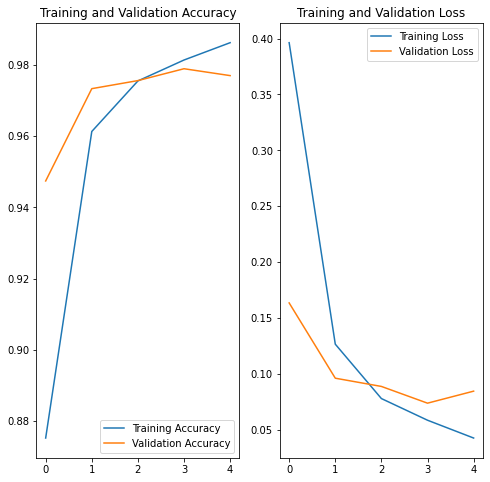

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
from keras.preprocessing import image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#prediction
uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn

  img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Saving 4711.png to 4711.png
1/1 [==============================] - 0s 12ms/step
This image most likely belongs to 5 with a 100.00 percent confidence.
